# **Neural Machine Translation by Jointly Learning to Align and Translate**

---

## **Abstract**
신경 기계 번역(NMT)을 개선하는 새로운 방법론을 제안함.  
기존의 NMT 모델, 특히 기본 encoder-decoder 구조의 한계를 해결하기 위해 제안된 새로운 방법론

### <span style="background-color:#fff5b1">**신경 기계 번역(NMT)**</span>
- 최근에 제안된 새로운 기계 번역 접근법 (2013-2014)
- 대부분의 제안된 신경 기계 번역 모델: 주로 encoder-decoder 계열에 속함
- **encoder-decoder 구조**: 소스 문장(source sentence)을 고정 길이 벡터로 encoding한 후, decoder가 이 벡터로부터 번역을 생성(decoding)
#### **목표**
- **번역 성능을 최대화**하기 위해 "함께 조정될 수 있는 단일 신경망(single neural network)" 구축하는 것
##### **Q. 논문에서 말하는 "단일 신경망(single neural network)"란?**
- 하나의 신경망 (x)
- **encoder와 decoder라는 개별 신경망들이 하나의 네트워크로 통합되어 공동으로 학습되고 최적화된다는 의미** (o)
- 단일 신경망의 의미
    - **단일 통합 시스템**: 인코더와 디코더는 각각 독립된 신경망이지만, 이들은 함께 작동하며 하나의 통합된 네트워크를 형성함.
    - **공동 학습**: 통합된 네트워크(인코더와 디코더)는 번역 성능을 극대화하기 위해 상호작용하며 공동으로 학습되고 최적화됨.
- 단일 신경망 구조 x: 전통적인 통계적 기계 번역(SMT)  
  단일 신경망 구조 o: NMT, 기본 encoder-decoder 구조

*주의1) NMT 개선에 대해서 단일 신경망 여부는 관련 없음. SMT와 기존 NMT의 차이점 관련임. 그러니 기본 encoder-decoder 구조에서 단일 신경망으로 개선되었다고 이해하지 말 것.*  

##### **Q. 인코더와 디코더가 공동으로 학습된다는 것과 정렬과 번역을 동시에 학습한다는 것은 같은 의미인가?**
- **인코더와 디코더의 공동 학습**: 인코더와 디코더의 공동 학습은 **번역 모델의 기본 학습 과정**으로, 두 신경망이 함께 학습되어 최적의 번역을 달성하도록 함. -> *SMT vs **NMT 관련***
- **정렬과 번역의 동시에 학습**: attention mechanism을 사용하여 decoder가 번역을 생성할 때 소스 문장의 특정 부분을 참조하고, 이 과정에서 소스와 타겟 간의 정렬을 학습하는 것 -> *기존 NMT vs **논문에서 개선한 NMT***

*주의2) "인코더와 디코더가 공동으로 학습된다는 것" != "정렬과 번역을 동시에 학습한다는 것" 다른 의미이니 헷갈리지 말 것.*

##### **Q. seq2seq model은 NMT의 한 종류인가?** (o)
-  Seq2Seq(Sequence-to-Sequence) 모델은 신경 기계 번역(NMT)의 한 종류임.
-  **NMT(신경 기계 번역)**
    - **신경망을 사용하여 소스 언어 문장을 타겟 언어 문장으로 번역하는 방법**
    - NMT 시스템은 단일 신경망으로 구성되며, encoder-decoder 구조를 통해 입력 문장을 번역함.
- **seq2seq model**: NMT의 한 종류로, 인코더-디코더 구조를 사용하여 입력 시퀀스를 출력 시퀀스로 변환하는 방식
    - **NMT의 대표적인 구현 방식** 중 하나
    - encoder-decoder 구조를 사용하여 입력 시퀀스를 고정 길이 벡터로 인코딩하고, 이를 사용하여 출력 시퀀스를 생성함.
    - 주로 RNN, LSTM, GRU 등을 사용하여 시퀀스 데이터를 처리함.
    - 최신 Seq2Seq 모델에서는 attention 메커니즘을 도입하여 인코더의 출력 중 중요한 부분에 더 집중할 수 있게 함. -> 번역 성능 향상
    - 기계 번역 뿐만 아니라 텍스트 요약, 대화 생성, 음성 인식 등 다양한 시퀀스 변환 작업에 사용됨.

### **In Paper**
#### **추측(기존의 한계점)**
- 고정 길이 벡터의 사용은 기본 encoder-decoder 아키텍처의 성능 향상에 있어 병목현상이다.
##### **encoder-decoder 접근 방식의 문제점**
- 신경망이 소스 문장의 모든 필요한 정보를 고정 길이 벡터로 압축할 수 있어야 함.
- 긴 문장을 잘 처리하지 못 함. (특히 training corpus보다 더 긴 문장)  
  -> 입력 문장 길이가 증가함에 따라 기본 encoder-decoder의 성능이 저하됨.
#### **새로운 방법론**
- decoder가 번역을 생성할 때, 단일 고정 길이 벡터만을 사용하는 대신, <span style="background-color:#FFE6E6">**소스 문장의 여러 부분을 참조**하자.</span>
    - 기존의 방법에서 "확장"함!
    - 기존: (decoder가 번역을 생성할 때) 고정 길이 벡터만 사용함
    - in paper: **고정 길이 벡터 사용 + (target word 예측과 관련된) 소스 문장의 여러 부분 참조**
- 소스 문장의 여러 부분을 참조할 수 있도록 하는 것 -> **attention mechanism**을 통해 이루어짐
    - **attention mechanism**: 디코더가 번역을 생성할 때 소스 문장의 특정 부분에 집중할 수 있게 하여, 고정 길이 벡터의 한계를 극복하고 번역 성능을 향상시키는 역할

---

## **Introduction**

### <span style="background-color:#fff5b1">**새로운 방법론: basic encoder-decoder model의 확장**</span>
encoder-decoder model 확장 -> <span style="background-color:#FFE6E6">**정렬(align)과 번역을 동시에 학습**</span>  
- **단어 생성 시 소프트 정렬**: 번역 과정에서 각 단어를 생성할 때마다 소스 문장에서 관련 정보가 집중된 위치를 소프트하게 검색
- **컨텍스트 벡터 기반 예측**: 검색된 소스 위치들과 관련된 컨텍스트 벡터와 이전에 생성된 모든 타겟 단어들을 기반으로 타겟 단어 예측
##### **Q. 정렬(align)이란?**
- (기계 번역 및 자연어 처리에서) **소스 언어와 타겟 언어 사이의 매핑**
- 즉, 소스 문장의 특정 단어가 타겟 문장의 어떤 단어에 대응하는지를 찾는 과정
- 기대효과: 번역 모델이 소스 문장을 더 잘 이해하고, 이를 기반으로 더 정확한 번역을 생성하는 데 도움을 줌.
- 정렬의 종류
    - 단어 수준 정렬: 소스 문장의 각 단어가 타겟 문장의 어떤 단어와 대응되는지를 찾음.
    - 어구 수준 정렬: 소스 문장의 특정 어구가 타겟 문장의 어떤 어구에 대응되는지를 찾음
    - **소프트 정렬**: 정렬 과정에서 각 단어가 특정 단어와 강하게 대응된다고 가정하지 않고, 여러 단어와의 연관성을 가중치로 표현함. 소프트 정렬은 **어텐션 메커니즘의 결과**로, **각 소스 단어가 특정 타겟 단어와 얼마나 관련 있는지를 가중치로 표현하는 방법** (소프트 정렬 메커니즘과 어텐션 메커니즘은 같은 개념을 가리킴)

> **기존 모델과 논문에서 제안된 모델 간의 가장 큰 차이점**  
> : 컨텍스트 벡터를 설정하는 방식
##### **Q. 기본 encoder-decoder model과 논문에서 제안된 모델의 컨텍스트 벡터 생성 방식의 차이점**
**기본 encoder-decoder model**
- **context vector**:
    - encoder가 source sentence를 인코딩하여 생성한 고정 길이 벡터
    - encoder의 마지막 hidden state
    - 정적 벡터, 고정적인 컨텍스트 벡터 -> 소스 문장의 모든 정보를 하나의 고정된 벡터에 압축함.
- decoder: 고정 길이 벡터를 기반으로 타겟 문장 생성

**논문에서 제안된 모델**
- **attention mechanism**:
    - 디코더가 각 타겟 단어를 생성할 때, 어텐션 메커니즘을 사용하여 디코더의 현재 상태와 인코더의 각 숨겨진 상태(hidden state) 간의 유사도를 계산하고 소프트맥스 함수를 통해 가중치를 할당하는 방식 (*어텐션 가중치 얻는 방법*)
    - 가중치: 소스 문장의 각 단어가 현재 타겟 단어를 예측하는 데 얼마나 중요한지를 나타냄
- **context vector**:
    - 어텐션 가중치를 인코더의 각 hidden state(h1, h2, ..., hn)에 곱하여 가중합을 계산함으로써 동적으로 생성됨.
    - encoder의 각 hidden state($h_i$): 소스 문장의 각 단어와 관련된 정보를 개별적으로 포함한 벡터들, 인코더가 소스 문장의 각 단어를 인코딩할 때 생성되는 벡터들(h1, h2, ..., hn)
    - 계산 과정:
      1. 디코더의 현재 상태와 인코더의 각 숨겨진 상태 간의 유사도를 계산하여 어텐션 가중치 구하기
      2. 이 가중치들을 사용하여 인코더의 숨겨진 상태들의 가중합을 계산하여 컨텍스트 벡터를 생성
    - 동적 벡터, 가변적인 컨텍스트 벡터 -> 각 타겟 단어를 생성할 때마다 소스 문장의 관련 정보를 동적으로 반영 (컨텍스트 벡터는 타겟 단어를 예측할 때마다 다를 수 있음)
- decoder: 생성된 컨텍스트 벡터와 이전에 생성된 타겟 단어들을 사용하여 다음 타겟 단어를 예측함.

---

## **LEARNING TO ALIGN AND TRANSLAT**

**정렬과 번역을 공동으로 학습하는 모델**  
기본 encoder-decoder 접근법의 한계를 해결하고 특히 긴 문장에서 번역 성능을 향상시키기 위해, 어텐션 메커니즘을 사용하여 동적으로 컨텍스트 벡터를 생성함.

**NMT를 위한 새로운 아키텍처**  
- encoder: 시퀀스 어노테이션을 위해 양방향 RNN(bidirectional RNN, BiRNN)을 사용함.
- decoder: 번역 과정에서 소스 문장을 통해 검색

##### **Q. 어노테이션(annotation)이란?**
- 정의: 인코더가 소스 문장의 각 단어를 처리한 후 생성하는 hidden state
- 입력 문장의 특정 단어와 그 주변 문맥 정보를 포함함.
- 생성: 인코더(특히 양방향 RNN)가 입력 문장의 각 단어에 대해 생성함.
- 역할: 디코더가 타겟 단어를 생성할 때 참조하는 중요한 정보로 사용, 어텐션 메커니즘을 통해 동적으로 선택됨.

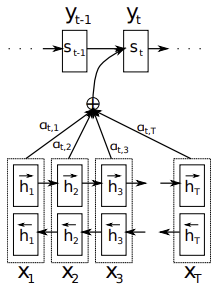

[그림1] 소스 문장 $(x_1,x_2,...,x_T)$이 주어졌을 때, $t$번째 타겟 단어 $y_t$를 생성하려고 시도하는 제안된 모델의 아키텍처

### **구성 요소**
#### **입력 문장(source sentence)**
- $x_1,x_2,...,x_T$: 소스 문장의 각 단어
- 각 단어 $x_i$는 encoder를 통해 hidden state 벡터 $h_i$로 encoding됨
#### **encoder**
- 소스 문장의 각 단어를 순차적으로 처리하여 $h_1,h_2,...,h_T$ 생성
- $h_i$: 입력 문장의 해당 단어와 그 주변 정보들을 포함함.
#### **decoder**
- 타겟 단어 $y_t$를 생성하기 위해 현재 상태 $s_t$와 이전 타겟 단어 $y_{t-1}$를 참조함.
- 각 타겟 단어를 생성할 때마다 컨텍스트 벡터 $c_t$를 계산함.
#### **attention mechanism**
- **어텐션 가중치($\alpha_{ij}$)**
    - 어텐션 가중치 $\alpha_{t1},\alpha_{t2},...,\alpha_{tT}$는 decoder의 현재 상태 $s_t$와 encoder의 각 hidden state $h_i$간의 유사도 $e_{ij}$에 기반하여 계산됨.
    - 소스 문장의 각 단어 $x_i$가 현재 타겟 단어 $y_j$를 예측하는 데 얼마나 중요한지를 나타냄
    - **소프트맥스 함수**: 유사도 $e_{ij}$ 정규화 -> 모든 가중치의 합이 1이 되도록 함.
    - $T_x$: 소스 문장의 길이  
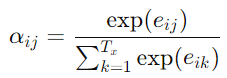

- **컨텍스트 벡터 $c_t$**: 어텐션 가중치와 인코더의 hidden state 벡터들의 가중합으로 계산됨.
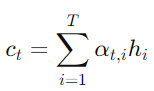

### **key point**
**1. 동적 컨텍스트 벡터 생성**
- 제안된 모델은 고정된 컨텍스트 벡터 대신, 디코더가 각 타겟 단어를 생성할 때마다 동적으로 컨텍스트 벡터를 생성함.
- 이는 입력 문장의 특정 부분에 집중할 수 있게 하여, 번역 성능을 더 향상시킴.

**2. 어텐션 가중치**
- 어텐션 가중치는 디코더의 현재 상태와 인코더의 각 숨겨진 상태 간의 유사도에 기반하여 계산됨.

**3. 정렬과 번역의 공동 학습**
- 정렬과 번역을 동시에 학습하여, 입력 문장의 중요한 부분들을 효과적으로 참조 가능